# Analyse of IForest FalseAlarm

## Test with 2 dimension dataset

In [8]:
import sys
import os
sys.path.append('../../../../../')
from datasets import datasets as datat
from IForest_DODiMDS import iforest_D as IFD
from metrics import performances
from metrics import visualization
visu = visualization.visualization()

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from time import time

from sklearn.metrics import confusion_matrix
from sklearn.metrics import roc_auc_score
from sklearn.metrics import precision_score, recall_score
from imblearn.metrics import specificity_score
from sklearn.metrics import f1_score

In [9]:
print(os.getcwd())

/Users/maurrastogbe/Documents/GitHub/OD_Jupyter/od_methods/IsoFo/IForest_Analysis/dimension_influence_IForestImplementation/2D


In [10]:
print(sys.path)

['/Users/maurrastogbe/Documents/GitHub/OD_Jupyter/od_methods/IsoFo/IForest_Analysis/dimension_influence_IForestImplementation/2D', '/Users/maurrastogbe/opt/anaconda3/lib/python37.zip', '/Users/maurrastogbe/opt/anaconda3/lib/python3.7', '/Users/maurrastogbe/opt/anaconda3/lib/python3.7/lib-dynload', '', '/Users/maurrastogbe/opt/anaconda3/lib/python3.7/site-packages', '/Users/maurrastogbe/opt/anaconda3/lib/python3.7/site-packages/aeosa', '/Users/maurrastogbe/opt/anaconda3/lib/python3.7/site-packages/IPython/extensions', '/Users/maurrastogbe/.ipython', '../../../../../', '../', '../../../../../']


## Generals settings

In [11]:
max_samples = 256
n_trees = 100
threshold = 0.6

## Chargement du jeu de données

In [16]:
dts = datat.synthetic_datasets(path_top="../../../../../")
X_full_brut, y_full_transform, full_dataset = dts.TwoD_V1_0()
print("X_full_brut")
print(X_full_brut.describe())
print("y_full_transform")
print(y_full_transform.describe())
print("full_dataset")
print(full_dataset.describe())

X_normals_brut, y_normals_transform, full_normals_dataset = datat.only_normals('../../../../../datasets/synthetic_2D_data/synthetic_2D_data_2019-12-16 12:38:37.320551.csv')
print("X_normals_brut")
print(X_normals_brut.describe())
print("y_normals_transform")
print(y_normals_transform.describe())
print("full_normals_dataset")
print(full_normals_dataset.describe())

Columns number = 3
X_full_brut
                 0            1
count  1516.000000  1516.000000
mean      0.127503     0.126336
std       3.637507     3.556798
min      -6.945707    -6.865832
25%      -3.037498    -2.882504
50%       0.220084     0.255531
75%       3.134291     3.083262
max       6.941126     6.843023
y_full_transform
                 0
count  1516.000000
mean      0.980211
std       0.198020
min      -1.000000
25%       1.000000
50%       1.000000
75%       1.000000
max       1.000000
full_dataset
                 0            1
count  1516.000000  1516.000000
mean      0.127503     0.126336
std       3.637507     3.556798
min      -6.945707    -6.865832
25%      -3.037498    -2.882504
50%       0.220084     0.255531
75%       3.134291     3.083262
max       6.941126     6.843023
Columns number = 3
X_normals_brut
                 0            1
count  1501.000000  1501.000000
mean      0.128270     0.127163
std       3.655368     3.574379
min      -6.945707    -6.86583

## Entraînement avec un jeu de données normal (normal) et faire la prédiction uniquement sur les données normales

[[   0    0]
 [ 194 1307]]
Score min = 0.5098829366449995
Score max = 0.7044877172992022


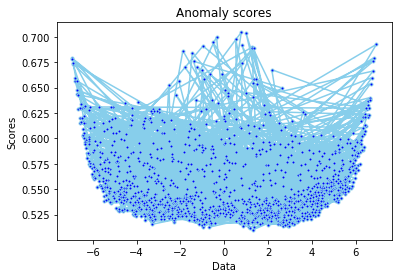

In [17]:
# Instanciation, fit and predict
func_IFD = IFD.IsolationForest(sample_size = max_samples, n_trees=n_trees)
IFD_y_pred_IF, scores =func_IFD.fit(X=X_normals_brut).predict(X=X_normals_brut, threshold=threshold)

print(confusion_matrix(y_normals_transform, IFD_y_pred_IF))

print("Score min = "+str(np.min(scores)))
print("Score max = "+str(np.max(scores)))
visu.plot_2D(X_normals_brut[0], scores,'Data', 'Scores', "Anomaly scores", link="b").show()

## Entraînement avec un jeu de données mixte (normal + anormal) et faire la prédiction uniquement sur les données normales

[[   0    0]
 [ 199 1302]]
Score min = 0.507773284693299
Score max = 0.707358012198301


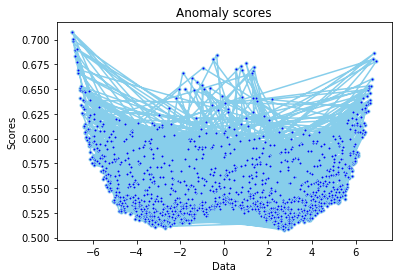

In [18]:
# Instanciation, fit and predict
func_IFD = IFD.IsolationForest(sample_size = max_samples, n_trees=n_trees)
IFD_y_pred_IF, scores =func_IFD.fit(X=X_full_brut).predict(X=X_normals_brut, threshold=threshold)

print(confusion_matrix(y_normals_transform, IFD_y_pred_IF))

print("Score min = "+str(np.min(scores)))
print("Score max = "+str(np.max(scores)))
visu.plot_2D(X_normals_brut[0], scores,'Data', 'Scores', "Anomaly scores", link="b").show()

## Entraînement sur une jeu de données mixte (normal + anormal) et faire la prédiction sur tout le jeu de données mais extraire uniquement les scores des données supposées être normales pour faire les analyses

[[   0   15]
 [ 233 1268]]
Score min = 0.5071786885212152
Score max = 0.7041235619784588


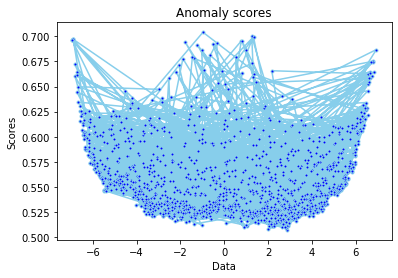

In [19]:
# Instanciation, fit and predict
func_IFD = IFD.IsolationForest(sample_size = max_samples, n_trees=n_trees)
IFD_y_pred_IF, scores =func_IFD.fit(X=X_full_brut).predict(X=X_full_brut, threshold=threshold)

print(confusion_matrix(y_full_transform, IFD_y_pred_IF))

print("Score min = "+str(np.min(scores)))
print("Score max = "+str(np.max(scores)))
visu.plot_2D(X_full_brut[0], scores,'Data', 'Scores', "Anomaly scores", link='b').show()

In [ ]:
scores_scores = []
for s in scores:
    scores_scores.append(s)
scores_data = pd.DataFrame(scores_scores, columns=['scores'])
merged_data = pd.concat([full_dataset, scores_data], axis=1, sort=False)
merged_data

In [ ]:
normals_data_and_scores = merged_data[merged_data[len(merged_data.columns) - 2] == '1']
normals_data_and_scores.sort_values(by="scores", ascending=False)

In [ ]:
print("Score min = "+str(np.min(normals_data_and_scores['scores'])))
print("Score max = "+str(np.max(normals_data_and_scores['scores'])))
visu.plot_2D(normals_data_and_scores[0], normals_data_and_scores['scores'],'Data', 'Scores', "Anomaly scores", link='b').show()

## Retrouver la toute première valeur  considérée par IForest comme anormal
Une analyse de son écart avec la moyenne pour donner une idée sur l'écart type à partir duquel IForest pense que les données sont anormales. Bien sûr cet écart type ne sera pas figé puisqu'il s'agit d'une forêt d'arbres aléatoires qui contribuent tous au calcul du score d'aberrance. Ainsi, l'écart type recherché (qui pourrait être une généralité) serait un interval. Un interval d'écart à partir duquel les données concernées sont déclarées anormales par IForest.

Un tel résultat s'il s'avère vérifié et applicable à tous les jeux de données voudrait dire que IForest aussi se base sur un interval de confiance pour distinguer les données normales des données anormales.

In [ ]:
# La moyenne de tout le jeu de données (normal + anormal)
mu_general = np.mean(X_full_brut)
print("mu = "+str(mu_general))
# L'écart type de tout le jeu de données (normal + anormal)
std_general = np.std(X_full_brut)
print("std = "+str(std_general))

In [ ]:
# Les données originalement normales dont le score est supérieur à > threshold
false_alarm_data = normals_data_and_scores[normals_data_and_scores['scores'] > threshold]
false_alarm_data.sort_values(by="scores", ascending=True)

In [ ]:
# Interval de dconfiance
max_interval = mu_general[0] + std_general[0]
print("max_interval = "+str(max_interval))
min_interval = mu_general[0] - std_general[0]
print("min_interval = "+str(min_interval))

In [ ]:
# Les données originalement normales mais mal classées dont la valeur est supérieure à mu+std
false_alarm_data_superior = false_alarm_data[false_alarm_data[0] > max_interval]
false_alarm_data_superior_sorted = false_alarm_data_superior.sort_values(by=0, ascending=True)
print(false_alarm_data_superior_sorted)
print("Nombre de données normales supérieur mal classées = "+str(len(false_alarm_data_superior)))

In [ ]:
# Les données originalement normales mais mal classées dont la valeur est inférieure à mu+std
false_alarm_data_under = false_alarm_data[false_alarm_data[0] < min_interval]
false_alarm_data_under_sorted = false_alarm_data_under.sort_values(by=0, ascending=False)
print(false_alarm_data_under_sorted)
print("Nombre de données normales inférieure mal classées = "+str(len(false_alarm_data_under)))

In [ ]:
# Vérifier si toutes les valeurs déclarées normales par IForest sont dans l'interval de confiance [mu-std, mu+std]
predicted_normals_data = merged_data[merged_data['scores'] < threshold]
print("Nombre de données classées normales = "+str(len(predicted_normals_data)))

predicted_normals_data_upper = predicted_normals_data[predicted_normals_data[0] >= min_interval]
print("Nombre de données classées normales supérieures à min = "+str(len(predicted_normals_data_upper)))

predicted_normals_data_between = predicted_normals_data_upper[predicted_normals_data_upper[0] <= max_interval]
print("Nombre de données classées normales dans l'interval  = "+str(len(predicted_normals_data_between)))

predicted_normals_data_under = predicted_normals_data[predicted_normals_data[0] < min_interval]
print("Nombre de données classées normales inférieures à min = "+str(len(predicted_normals_data_under)))
predicted_normals_data_upper_max = predicted_normals_data[predicted_normals_data[0] > max_interval]
print("Nombre de données classées normales supérieures à max  = "+str(len(predicted_normals_data_upper_max)))
print("Nombre de données classées normales hors de l'interval de confiance  = "+
      str(len(predicted_normals_data_under) + len(predicted_normals_data_upper_max)))

#predicted_normals_data_between = predicted_normals_data[predicted_normals_data[0] >= min_interval and predicted_normals_data[0] <= max_interval]
#print("Nombre de données classées normales between  = "+str(len(predicted_normals_data_between)))

In [ ]:
# Vérifier si toutes les valeurs déclarées normales par IForest sont dans l'interval de confiance [mu-2std, mu+2std]
new_max_interval = mu_general[0] + 2 * std_general[0]
print("new_max_interval = "+str(new_max_interval))
new_min_interval = mu_general[0] - 2 * std_general[0]
print("new_min_interval = "+str(new_min_interval))

new_predicted_normals_data_upper = predicted_normals_data[predicted_normals_data[0] >= new_min_interval]
print("Nombre de données classées normales supérieures à min = "+str(len(new_predicted_normals_data_upper)))

new_predicted_normals_data_between = new_predicted_normals_data_upper[new_predicted_normals_data_upper[0] <= new_max_interval]
print("Nombre de données classées normales dans l'interval  = "+str(len(new_predicted_normals_data_between)))

new_predicted_normals_data_under = predicted_normals_data[predicted_normals_data[0] < new_min_interval]
print("Nombre de données classées normales inférieures à min = "+str(len(new_predicted_normals_data_under)))
new_predicted_normals_data_upper_max = predicted_normals_data[predicted_normals_data[0] > new_max_interval]
print("Nombre de données classées normales supérieures à max  = "+str(len(new_predicted_normals_data_upper_max)))
print("Nombre de données classées normales hors de l'interval de confiance  = "+
      str(len(new_predicted_normals_data_under) + len(new_predicted_normals_data_upper_max)))

#predicted_normals_data_between = predicted_normals_data[predicted_normals_data[0] >= min_interval and predicted_normals_data[0] <= max_interval]
#print("Nombre de données classées normales between  = "+str(len(predicted_normals_data_between)))

In [ ]:
# Vérifier si toutes les valeurs déclarées normales par IForest sont dans l'interval de confiance [mu-2std, mu+2std]
new_predicted_data_upper = merged_data[merged_data[0] >= new_min_interval]
print("Nombre de données classées normales supérieures à min = "+str(len(new_predicted_data_upper)))

new_predicted_data_between = new_predicted_data_upper[new_predicted_data_upper[0] <= new_max_interval]
print("Nombre de données classées normales dans l'interval  = "+str(len(new_predicted_data_between)))

## Conclusion

1- l'entraînement avec un jeu de données mixte (normal + anormal) et faire la prédiction uniquement sur les données normales

2- l'entraînement sur une jeu de données mixte (normal + anormal) et faire la prédiction sur tout le jeu de données mais extraire uniquement le scores des données supposées être normales pour faire les analyses

1 et 2 donnent pratiquement les même résultats. Ce qui est normal puisque la phase d'entraînement et celle de scoring sont indépendantes en terme de données exploitées.

L'analyse des données normales mal classées à conduire au constat que les fausses alertes ont été faites sur les données dont la valeur est hors de l'interval de confiance ]mu-std, mu+std[.

L'objectif étant de réduire considérablement les fausses alertes tout en gardant la meilleure spécificité et les meilleurs CPU Time, complexity et memory consumption,
- Proposer une formule de prédiction tenant compte de la moyenne et de l'écart standart de tout le jeu de données
    - Une idée: Ne plus faire la prédiction en se basant sur 0.5. Faire la prédiction en prenant comme référence le score de l'observation correspondante à la moyenne des valeurs. Au lieu de créer un interval de valeur de confiance comme pour les méthodes statistiques, créé une interval de scores de confiance en faisant le match entre l'observation correspondante à la valeur moyenne - écart type et celle correspondante à la valeur moyenne + écart type qui seront les limites de l'interval de scores de confiance.
    - Vérifier d'abord (dans le but de valider la méthode) que ces deux observations limites sont réellement des obervations normalement normales
- OU Proposer une formule de scoring tenant compte de l'effet de l'interval de confiance.
- Si les formules fonctionnent sur ce jeu de données alors tester sur les autres jeux de données pour voir l'efficacité.

Autre chose à vérifier: 
- Si les échantillons utilisé pour les arbres contiennent des valeurs anormales et à quel pourcentage pour chaque échantillon.
